# UpData - História legal, agora me mostre os dados!
Somos a UpData e começamos nossa jornada fornecendo consultoria de empresas e implementando a cultura 
data driven criando assim métricas que melhoram o marketing e faturamento da empresa.
 
Hoje, estamos trabalhando com uma empresa chamada 'WeAvocado', uma empresa grande que existe desde 2015 e em
2018 nos aliamos para fornecemos nosssos serviços, tendo em vista o decrescente faturamento da empresa.

![alternative text](./weAvocado.png)

In [40]:
#Importando a tabela
import numpy as np
import pandas as pd

# df = spark.read.csv("/FileStore/tables/avocado.csv", header=True, sep=",")
# df = df.toPandas()
df = pd.read_csv('./avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df["region"].value_counts()

Out[11]: Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago            

In [ ]:
#Conhecendo os dados
print("Shape: ", df.shape)
print("Nulos: ", df.isnull().sum())

#Deletar TotalUS

Shape:  (18249, 14)
Nulos:  _c0             0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [6]:
#Formatar colunas e tratar dados
df.rename(columns={'_c0': 'index'}, inplace = True)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [44]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [69]:
df.sort_values('Date', inplace=True)
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Month'] = df['Date'].dt.month

In [158]:
# Tratamento dos dados para variáveis
quantidade_vendida_por_ano = round(df.groupby(['year','Month']).sum().filter(['Total Volume'])/1000000, 2)
media_preco_por_tipo_ao_longo_do_tempo = df.groupby(['year','Month', 'type']).mean().filter(['AveragePrice'])
preco_maximo_por_tipo_ao_longo_do_tempo = df.groupby(['year','Month', 'type']).max().filter(['AveragePrice'])
preco_minimo_por_tipo_ao_longo_do_tempo = df.groupby(['year','Month', 'type']).min().filter(['AveragePrice'])


Text(0.5, 1.0, 'Quantidade de vendas de abacate por ano.  (em milhões)')

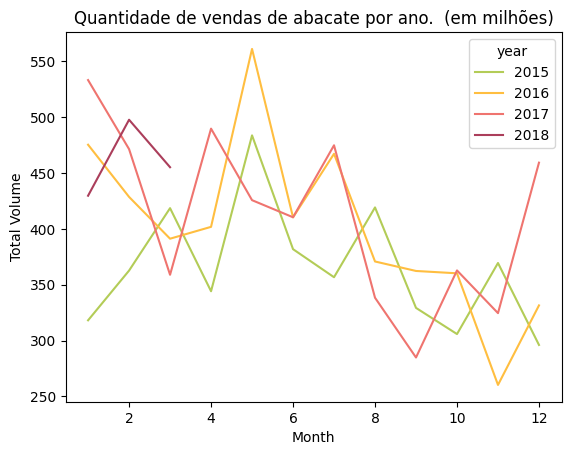

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lineplot(quantidade_vendida_por_ano.reset_index(), x='Month', y='Total Volume', hue='year', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']).set_title('Quantidade de vendas de abacate por ano.  (em milhões)')

Percebe-se que nos meses de Abril e Maio, há uma demanda maior que no restante do ano.
Já em meses mais frios, como de agosto à novembro, a demanda é a menor do ano.

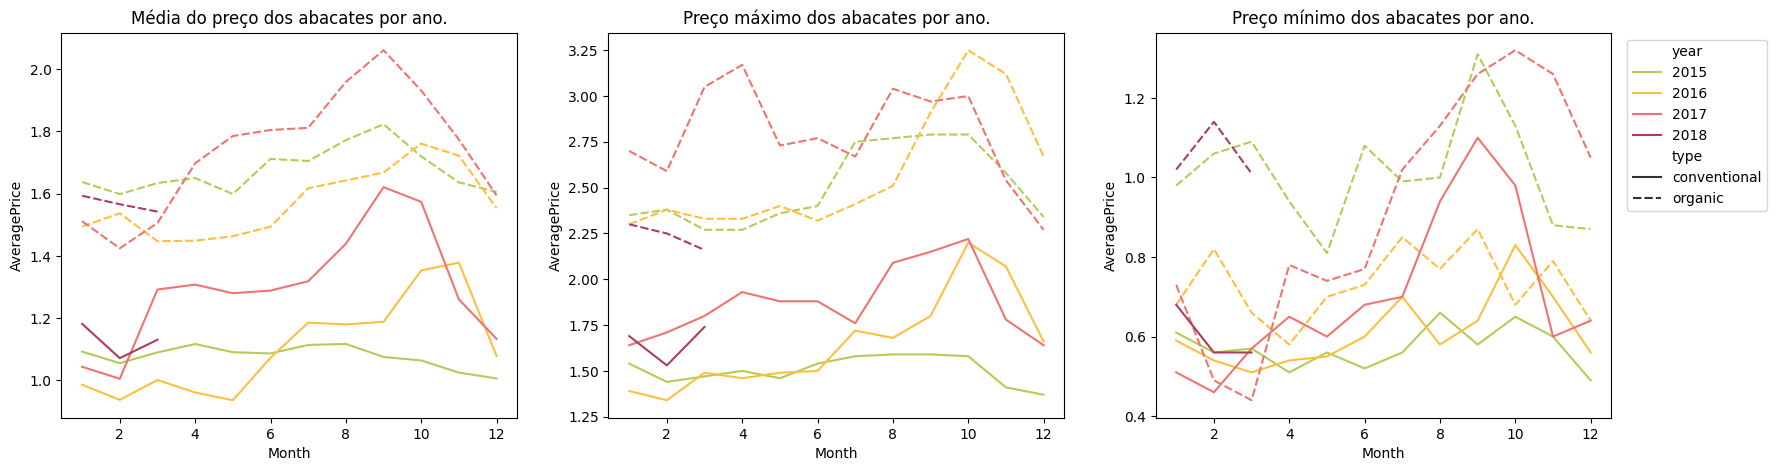

In [161]:
fig, axis = plt.subplots(1,3, figsize=(20,5))

sns.lineplot(media_preco_por_tipo_ao_longo_do_tempo.reset_index(),ax=axis[0], legend=False, x='Month', y='AveragePrice', hue='year', style='type', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']);
axis[0].set_title('Média do preço dos abacates por ano.')

sns.lineplot(preco_maximo_por_tipo_ao_longo_do_tempo.reset_index(),ax=axis[1], legend=False, x='Month', y='AveragePrice', hue='year', style='type', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']);
axis[1].set_title('Preço máximo dos abacates por ano.')

sns.lineplot(preco_minimo_por_tipo_ao_longo_do_tempo.reset_index(), ax=axis[2], x='Month', y='AveragePrice', hue='year', style='type', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']);
axis[2].set_title('Preço mínimo dos abacates por ano.')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');

In [ ]:
Referências
https://www.kaggle.com/datasets/neuromusic/avocado-prices